In [31]:
import stim

from surface_sim.setups import CircuitNoiseSetup
from surface_sim.models import CircuitNoiseModel
from surface_sim import Detectors
from surface_sim.experiments import schedule_from_circuit, experiment_from_schedule
from surface_sim.circuit_blocks.unrot_surface_code_css import gate_to_iterator
from surface_sim.layouts import unrot_surface_codes

circuit = stim.Circuit(
    """
    R 0 1
    TICK
    CNOT 0 1
    TICK
    M 0
    MX 1
    """
)

layouts = unrot_surface_codes(circuit.num_qubits, distance=2)
setup = CircuitNoiseSetup()
model = CircuitNoiseModel.from_layouts(setup, *layouts)
detectors = Detectors.from_layouts("pre-gate", *layouts)

setup.set_var_param("prob", 1e-3)

schedule = schedule_from_circuit(circuit, layouts, gate_to_iterator)
stim_circuit: stim.Circuit = experiment_from_schedule(
    schedule, model, detectors, anc_reset=True
)

In [32]:
circuit.num_qubits

2

In [33]:
circuit

stim.Circuit('''
    R 0 1
    TICK
    CX 0 1
    TICK
    M 0
    MX 1
''')

In [34]:
detectors = []
for instruction in stim_circuit:
    if instruction.name == 'DETECTOR':
        detectors.append(instruction)

len(detectors)

20

In [35]:
sampler = stim_circuit.compile_detector_sampler()

In [50]:
shots=10
rounds=2

In [48]:
syndrome, labels = sampler.sample(shots=shots, separate_observables=True)

In [49]:
syndrome.shape, labels.shape

((10, 20), (10, 2))

In [54]:
syndrome_reshaped = syndrome.reshape((shots, rounds, circuit.num_qubits,  -1))

In [58]:
syndrome_reshaped

array([[[[False, False,  True, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False]]],


       [[[False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False]]],


       [[[False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False]]],


       [[[False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False,  True],
         [False, False, False, False, False]]],


       [[[False, False,  True, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False]]],


       [[[False, False, False, False, False],
    

<Axes: >

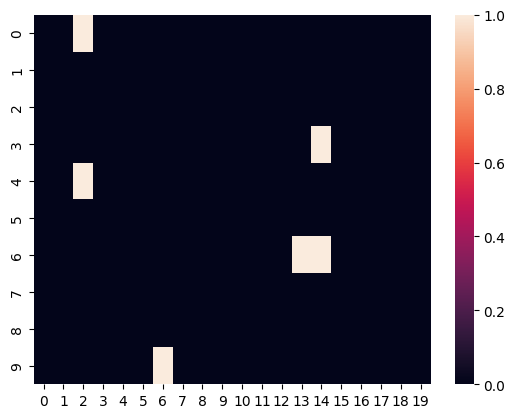

In [57]:
import seaborn as sns

sns.heatmap(syndrome)

In [55]:
syndrome_reshaped.shape

(10, 2, 2, 5)

In [37]:
stim_circuit.num_detectors

20

In [38]:
stim_circuit.num_measurements, stim_circuit.num_observables

(26, 2)

In [39]:
det = detectors[0]
dir(det)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_pybind11_conduit_v1_',
 'gate_args_copy',
 'name',
 'num_measurements',
 'tag',
 'target_groups',
 'targets_copy']

In [40]:
circuit.num_ticks

2

In [41]:
det

stim.CircuitInstruction('DETECTOR', [], [0, 1, 0])

In [42]:
det.gate_args_copy()

[0.0, 1.0, 0.0]

In [43]:
det.targets_copy()

[]